In [37]:
import pandas as pd
import numpy as np

In [38]:
dfe = pd.read_csv("../Data/Data_cleaned/emotion_cleaned_rudy.csv")[["target", "clean_text"]].dropna()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(dfe["clean_text"], dfe.target, test_size=0.2, shuffle=True, random_state=1)

In [41]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [61]:
X_train_t = vectorizer.transform(X_train).toarray()
X_test_t = vectorizer.transform(X_test).toarray()

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import learning_curve

In [70]:
model = MultinomialNB()
model.fit(X_train_t, y_train)

MultinomialNB()

In [71]:
import matplotlib.pyplot as plt

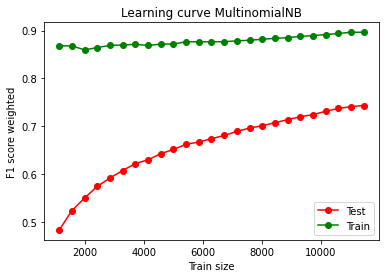

In [72]:
train_sizes, train_score, val_score = learning_curve(model, X_train_t, y_train,
                                              train_sizes=np.linspace(0.1,1,25),
                                              scoring="f1_weighted", cv=3)

plt.plot(train_sizes, val_score.mean(axis=1), "o-", color="r", label="Test")
plt.plot(train_sizes, train_score.mean(axis=1), "o-", color="g", label="Train")
plt.xlabel("Train size")
plt.ylabel("F1 score weighted")
plt.title("Learning curve MultinomialNB")
plt.legend()

In [73]:
from sklearn.metrics import f1_score

In [74]:
print("train_score:", f1_score(model.predict(X_train_t), y_train, average="weighted"))
print("val_score:", f1_score(model.predict(X_test_t), y_test, average="weighted"))

train_score: 0.9183493286282516
val_score: 0.8011719577955912
